In [52]:
import pandas as pd
data=pd.read_csv('main1.csv')
data1=data.copy()

In [53]:
data1.head()

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,Male,Bachelor Degree,2007,Urban,9,Private limited company,Employed
1,Male,Diploma,2010,Urban,9,Private limited company,Employed
2,Male,Diploma,2014,Urban,5,Private limited company,Employed
3,Male,PUC,2014,Remote,1,Private limited company,Employed
4,Male,Bachelor Degree,2017,Urban,3,Private limited company,Employed


In [54]:
import warnings

In [55]:
warnings.filterwarnings('ignore')

In [56]:
data1.isnull().sum()

Gender           0
Qualification    0
Passout          0
Origin           0
Experience       0
Company_type     0
Status           0
dtype: int64

In [57]:
data1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [58]:
data1['Gender']=data1['Gender'].map({'Male':1,'Female':0})

In [59]:
data1.head(1)

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,1,Bachelor Degree,2007,Urban,9,Private limited company,Employed


In [60]:
data1['Qualification'].unique()

array(['Bachelor Degree', 'Diploma', 'PUC', 'BCA', 'PG', 'Phd'],
      dtype=object)

In [61]:
data1['Qualification']=data1['Qualification'].map({'Bachelor Degree':5,'Diploma':4,'PUC':3 ,'BCA':2 ,'PG':1 ,'Phd':0})

In [62]:
data1.head(1)

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,1,5,2007,Urban,9,Private limited company,Employed


In [63]:
data1['Origin'].unique()

array(['Urban', 'Remote', 'Rural', 'Semi urban'], dtype=object)

In [64]:
data1['Origin']=data1['Origin'].map({'Urban':3,'Remote':2,'Rural':1,'Semi urban':0})

In [65]:
data1.head(1)

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,1,5,2007,3,9,Private limited company,Employed


In [66]:
data1['Company_type'].unique()

array(['Private limited company', 'Corporative', 'Partnership',
       'International company', 'Not yet working',
       'Nonprofit Organization', 'Private institution'], dtype=object)

In [67]:
data1['Company_type']=data1['Company_type'].map({'Private limited company':6,'Corporative':5,'Partnership':4,'International company':3,
                                 'Not yet working':2, 'Nonprofit Organization':1,'Private institution':0})      

In [68]:
data1.head(1)

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,1,5,2007,3,9,6,Employed


In [69]:
data1['Status'].unique()

array(['Employed', 'Unemployed'], dtype=object)

In [70]:
data1['Status']=data1['Status'].map({'Employed':1,'Unemployed':0})

In [71]:
data1.head(1)

,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,1,5,2007,3,9,6,1


In [72]:
x=data1.drop('Status',axis=1)
y=data1['Status']

In [73]:
x

,Gender,Qualification,Passout,Origin,Experience,Company_type
0,1,5,2007,3,9,6
1,1,4,2010,3,9,6
2,1,4,2014,3,5,6
3,1,3,2014,2,1,6
4,1,5,2017,3,3,6
...,...,...,...,...,...,...
496,0,1,2020,1,1,2
497,0,1,2020,0,1,2
498,0,4,2021,0,1,2
499,0,4,2021,0,1,6


In [74]:
y

0      1
1      1
2      1
3      1
4      1
      ..
496    0
497    0
498    0
499    0
500    0
Name: Status, Length: 501, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred1=lr.predict(x_test)

In [79]:
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
score1=accuracy_score(y_test,y_pred1)

In [82]:
score1

0.8712871287128713

In [83]:
new_data=pd.DataFrame({
    'Gender':1,
    'Qualification':5,
    'Passout':2007,
    'Origin':0,
    'Experience':5,
    'Company_type':4,
},index=[0])

In [84]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [85]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print("Employed")
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Unemployed")

Employed
You will be placed with probability of 0.96


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Passout', ylabel='count'>

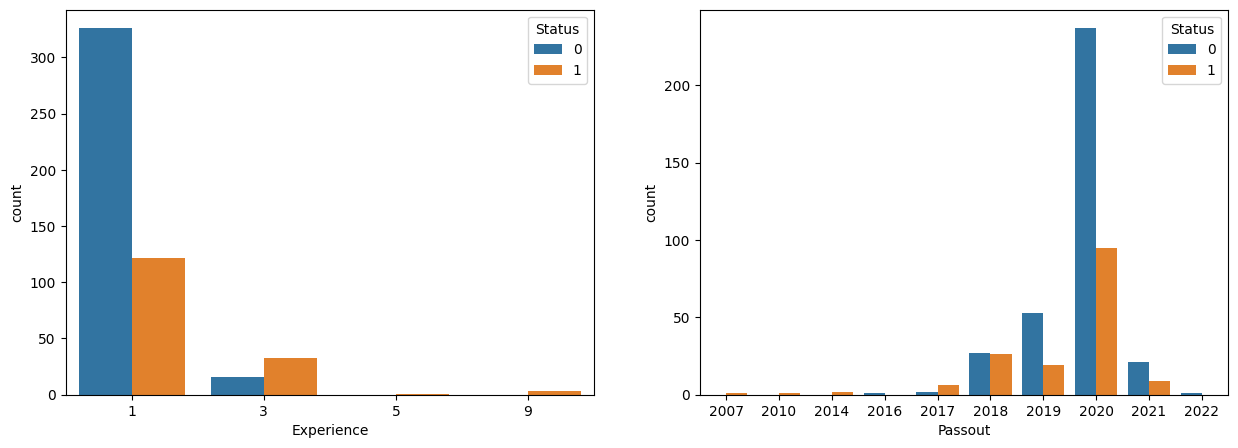

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Experience',hue='Status',data=data1)
plt.subplot(1,2,2)
sns.countplot(x='Passout',hue='Status',data=data1)

<Axes: xlabel='Origin', ylabel='count'>

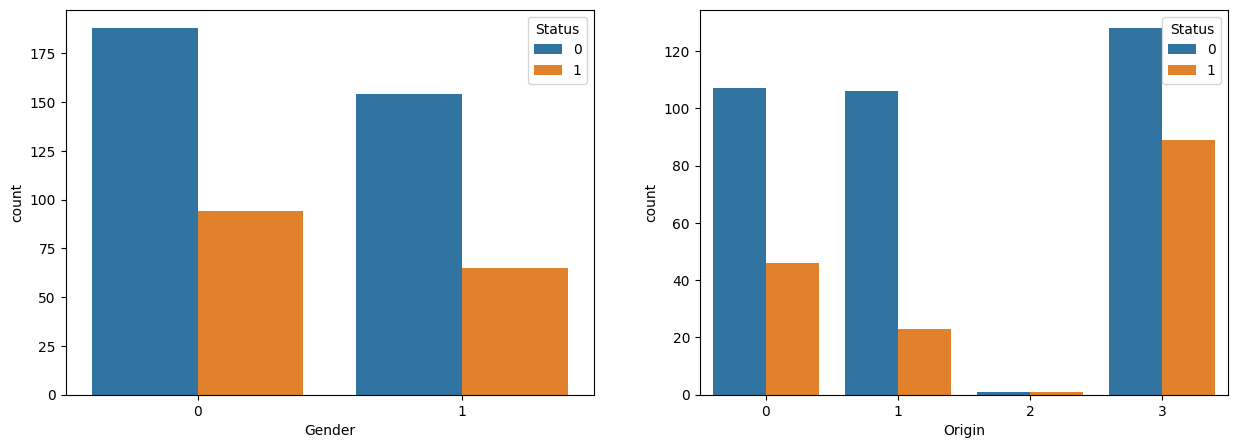

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Gender',hue='Status',data=data1)
plt.subplot(1,2,2)
sns.countplot(x='Origin',hue='Status',data=data1)

<Axes: xlabel='Company_type', ylabel='count'>

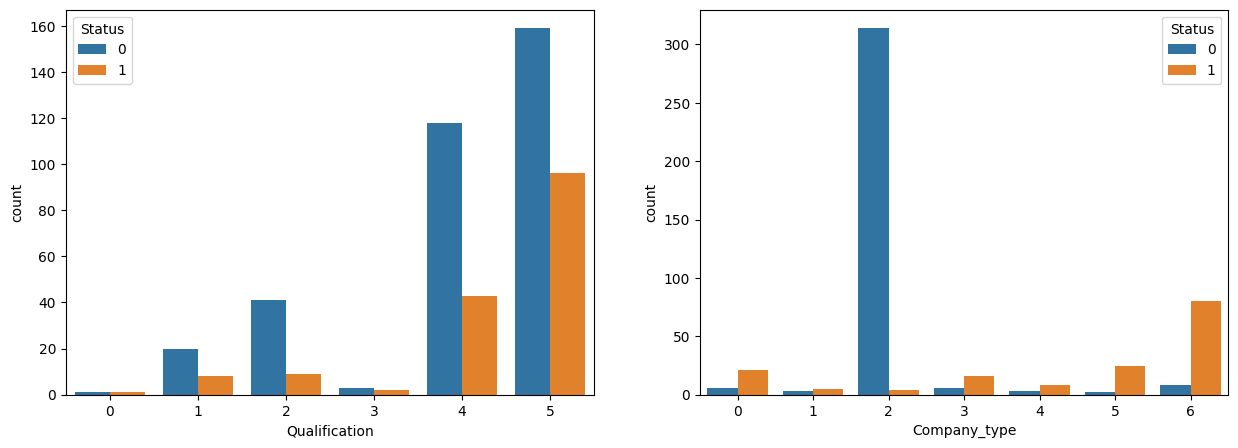

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Qualification',hue='Status',data=data1)
plt.subplot(1,2,2)
sns.countplot(x='Company_type',hue='Status',data=data1)